In [1]:
# Import the basic library
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# os.getcwd() - where the directory path is

In [3]:
#os.chdir("path") # change the directory path

In [4]:
USAHousing = pd.read_csv('USA_Housing.csv')
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
USAHousing.shape

(5000, 7)

In [6]:
# information about the data
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Data Pre-processing part

In [9]:
# Missing value
USAHousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [10]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

<AxesSubplot:ylabel='Avg. Area Income'>

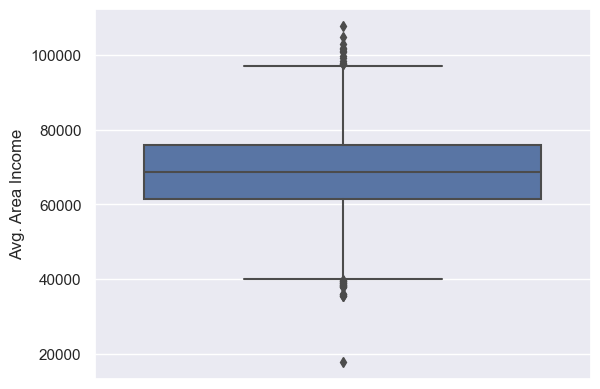

In [11]:
# Outlier
sns.boxplot(y='Avg. Area Income', data=USAHousing)

<AxesSubplot:ylabel='Avg. Area House Age'>

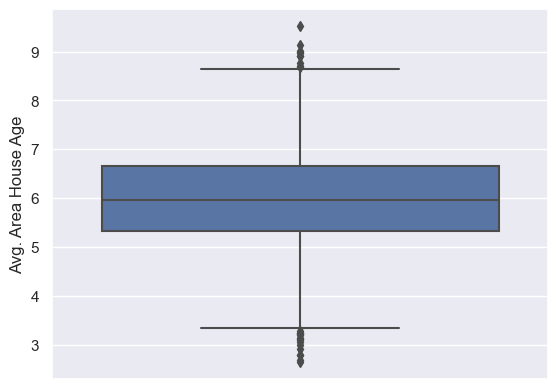

In [12]:
sns.boxplot(y='Avg. Area House Age', data=USAHousing)

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

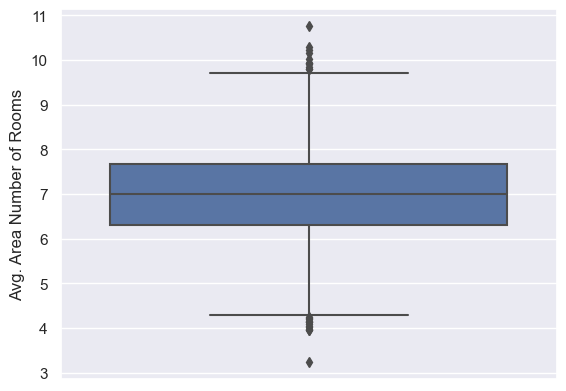

In [13]:
sns.boxplot(y='Avg. Area Number of Rooms', data=USAHousing)

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

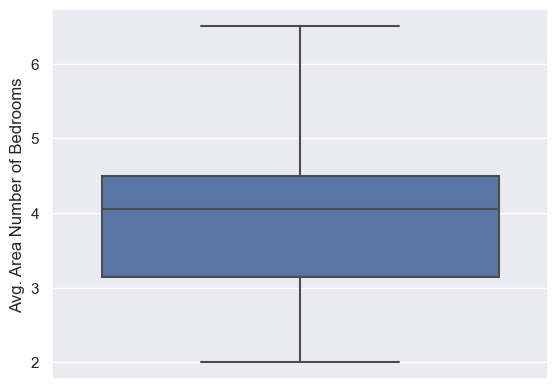

In [14]:
sns.boxplot(y='Avg. Area Number of Bedrooms', data=USAHousing)

<AxesSubplot:ylabel='Area Population'>

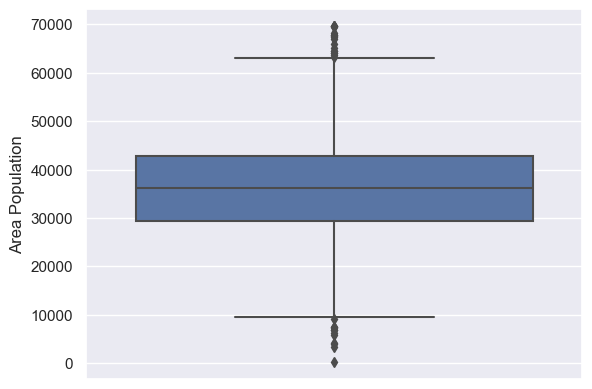

In [15]:
sns.boxplot(y='Area Population', data=USAHousing)

In [16]:
# Handling outlier part
Q1 = USAHousing.quantile(0.25)
Q3 = USAHousing.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5*IQR
neg_outlier = Q1 - 1.5*IQR

In [17]:
print(Q1)
print("*************************************")
print(Q3)
print("*************************************")
print(IQR)
print("*************************************")
print(pos_outlier)
print("*************************************")
print(neg_outlier)
print("*************************************")

Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
*************************************
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
*************************************
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64
*********************************

In [18]:
# we remove the outlier value which comes above the positive outlier and below the neg outlier
USAHousing = USAHousing[~((USAHousing < (Q1 - 1.5*IQR)) | 
                          (USAHousing > (Q3+1.5*IQR))).any(axis=1)]

In [19]:
USAHousing.shape

(4865, 7)

In [20]:
# in practice - when you have less than 5% outlier data there, you can use above method otherwise use transformation approach (np.where condition)

In [21]:
(135/4865)*100

2.774922918807811

In [22]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [23]:
# Encoding part - Address is non-significant variable, hence we have to drop it
USAHousing = USAHousing.iloc[:,0:-1]
# iloc means slicing column wise

In [24]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [25]:
# Feature Scaling - will do later. First I'm doing EDA

# Exploratory Data Analysis - EDA

from pandas_profiling import ProfileReport
report = ProfileReport(USAHousing)
report.to_file(output_file='output.html')

In [26]:
USAHousing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


<AxesSubplot:>

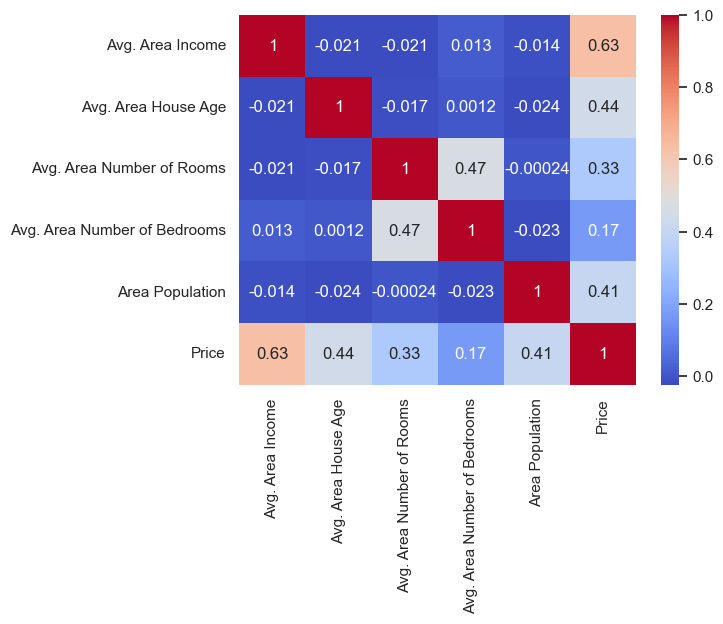

In [27]:
sns.heatmap(USAHousing.corr(), annot=True, cmap='coolwarm') # bi-variate

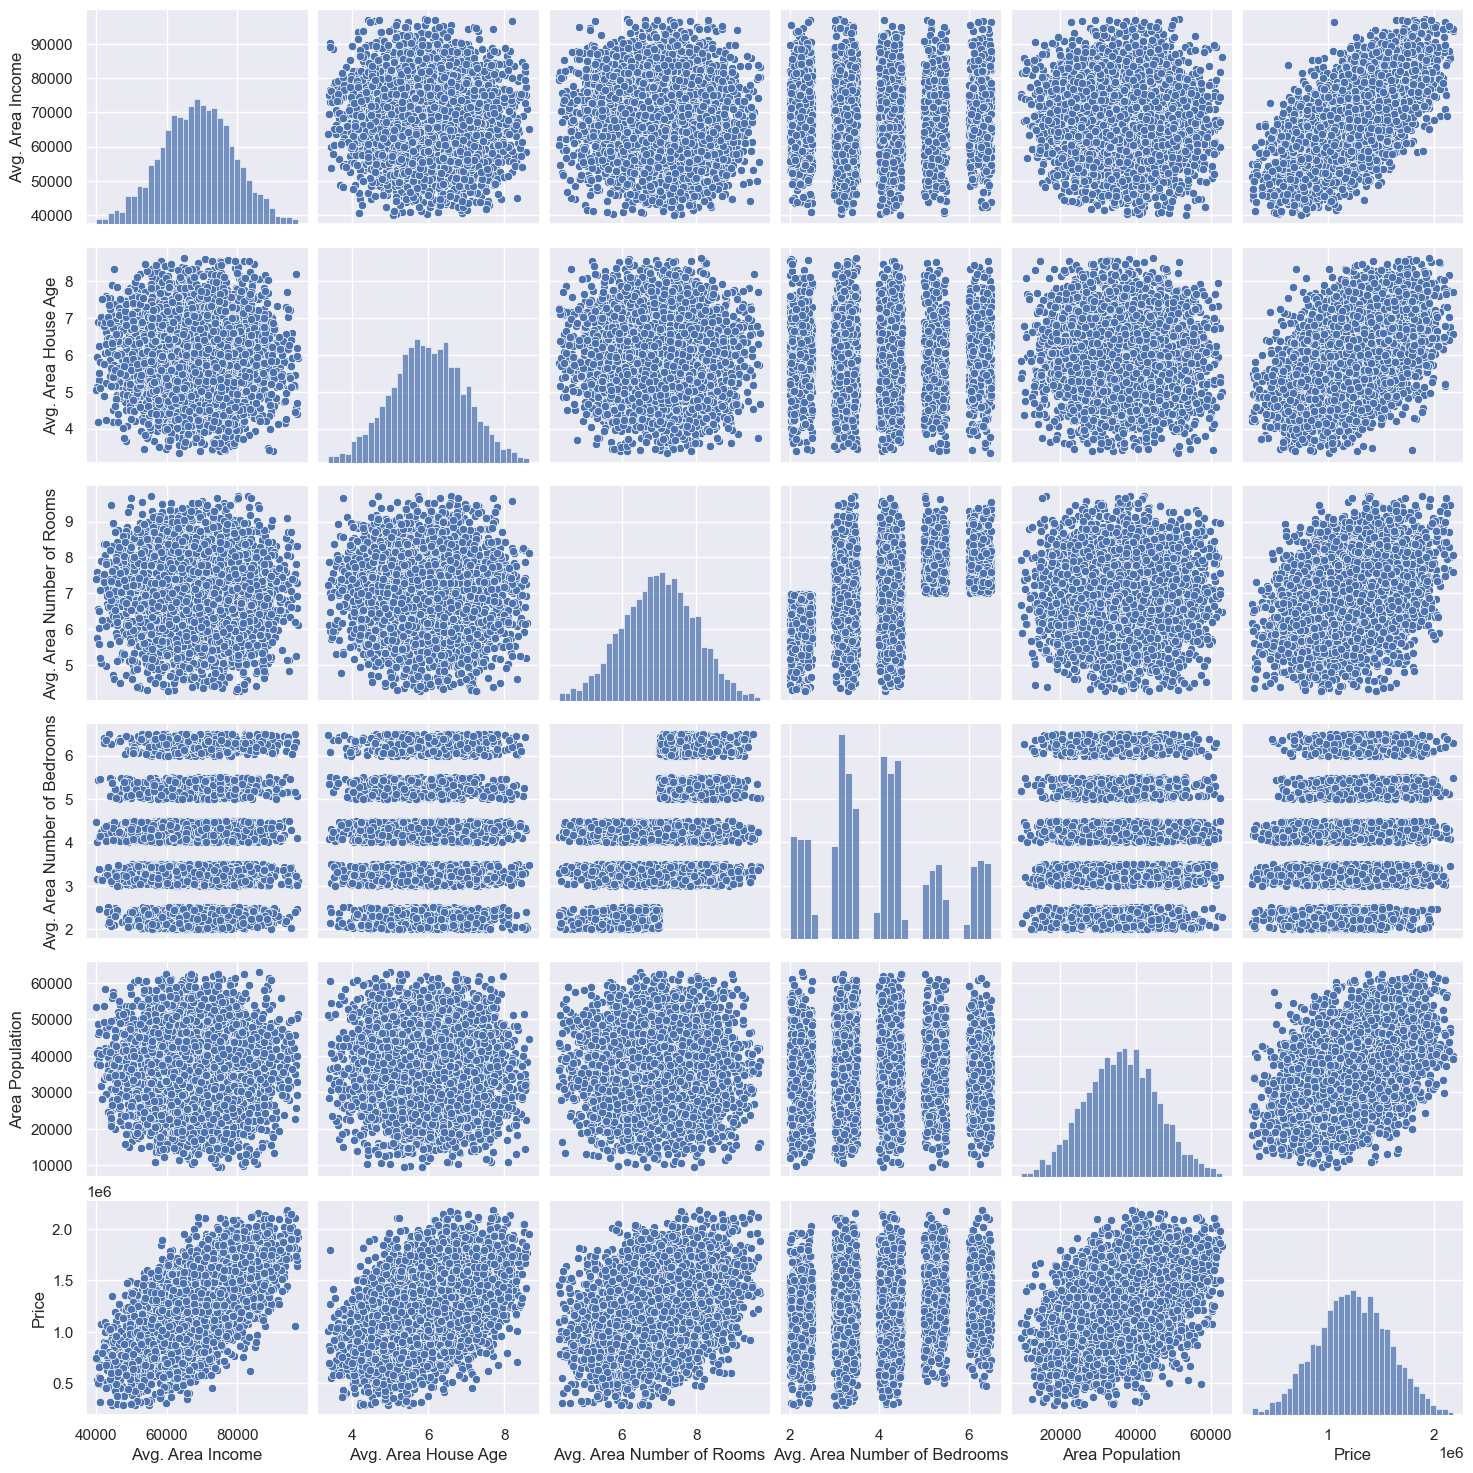

In [28]:
sns.pairplot(USAHousing) # multivariate/bi-variate

<AxesSubplot:xlabel='Price', ylabel='Density'>

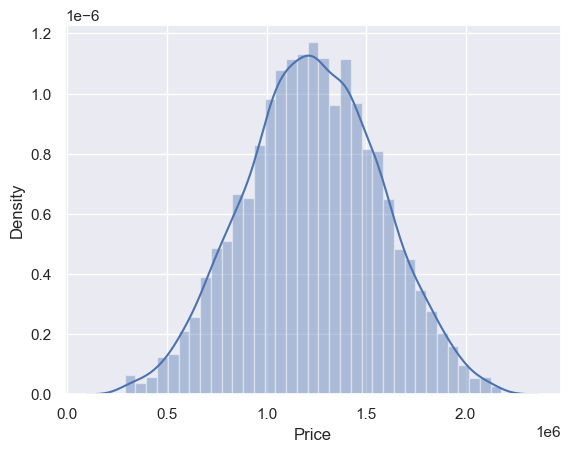

In [29]:
sns.distplot(USAHousing['Price']) # univariate

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Density'>

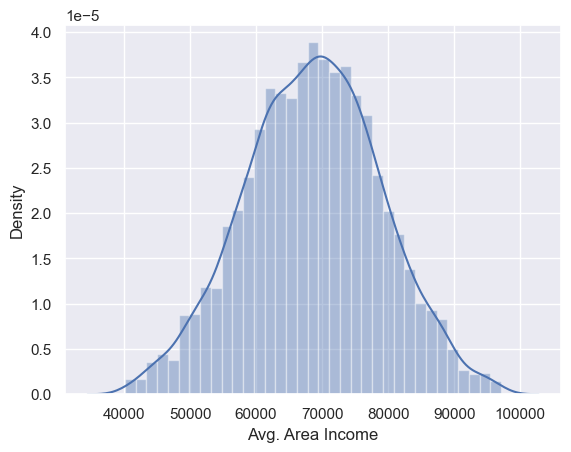

In [30]:
sns.distplot(USAHousing['Avg. Area Income'])

In [31]:
# split the data into independent variable and dependent variable
x = USAHousing.drop(['Price'], axis=1) # indepent variable
y = USAHousing['Price'] # dependent variable

In [32]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [33]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

# Variance Inflation Factor (VIF) - to check multicollinearity relation between Ind vs Ind variable

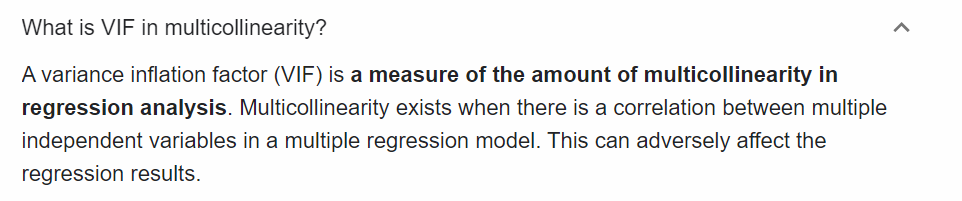

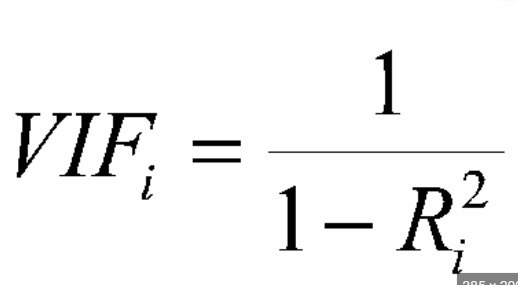

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) 
                                    for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance Inflation Factor,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


# there is no multicollinearity found in the USAHousing price dataset
# preprocessing part completed
# EDA part completed

In [36]:
# split the data into train and test
# Model Building
# predict the model with test data
# evaluate the model
# check all assumption including p-value and adj r-sqr
# Ridge and Lasso method (regularisation method)

In [37]:
# Splitting the data into traing for building model and test for predicting and evaluation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=121)

In [38]:
x_train

array([[ 0.40819698,  0.52263173,  0.13204745,  1.08996969,  0.46448907],
       [ 0.12242731,  0.89940902,  0.75649482,  1.80248957, -0.90686776],
       [-1.44117372,  1.40853714,  0.55509024,  0.94422698, -0.39557095],
       ...,
       [ 1.67803644,  0.58193706,  0.07446253,  1.11426014, -1.53451671],
       [-0.56563708,  0.81165808, -1.26908309, -0.56178095,  2.37505695],
       [-1.86982831,  1.81982379, -0.24117814, -1.42004354, -0.02644856]])

In [39]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3405, 5) (1460, 5) (3405,) (1460,)


# Building Linear Regression Method

In [40]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [41]:
linear_model.intercept_

1230060.534626833

In [42]:
linear_model.coef_

array([221792.28730957, 158514.37750777, 115889.92986517,   3854.86498437,
       144212.36135748])

In [43]:
# Y = linear_model.intercept_ + array([221792.28730957, 158514.37750777, 115889.92986517,   3854.86498437,144212.36135748])*x_train

In [44]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [45]:
# Y = 1230060.534626833 + 221792.28730957*Avg. Area Income + 158514.37750777*Avg. Area House Age+115889.92986517*Avg. Area Number of Rooms'
          #  + 3854.86498437*Avg. Area Number of Bedrooms+144212.36135748*Area Population

# Predict the model with test data

In [46]:
y_pred = linear_model.predict(x_test)
y_pred

array([1190235.05110177, 1015152.67042352, 1398846.01811172, ...,
       1659143.58561231, 2004711.02831113, 1240488.65718076])

In [47]:
print(y_test)
print(y_pred)

4981    1.203850e+06
1312    9.344923e+05
1393    1.398310e+06
1469    1.023965e+06
1746    9.635319e+05
            ...     
1739    7.186506e+05
3776    6.992228e+05
2125    1.613326e+06
4710    1.924562e+06
2961    1.178554e+06
Name: Price, Length: 1460, dtype: float64
[1190235.05110177 1015152.67042352 1398846.01811172 ... 1659143.58561231
 2004711.02831113 1240488.65718076]


# Evaluation metrics to find accuracy/r-square value

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9114867182323118

# Building OLS (Ordinary Least Square) method 

In [49]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.3, random_state=121)

In [50]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [51]:
reg_model = smf.OLS(endog = y_train1, exog=x_train1).fit()

In [52]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.987e+04
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                        0.00
Time:                        11:16:24   Log-Likelihood:                         -46884.
No. Observations:                3405   AIC:                                  9.378e+04
Df Residuals:                    3400   BIC:                                  9.381e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.0604      0.316     31.835      0.000       9.441      10.680
Avg. Area House Age           5.056e+04   3487.814     14.497      0.000    4.37e+04    5.74e+04
Avg. Area Number of Rooms    -1.067e+04   3847.048     -2.775      0.006   -1.82e+04   -3131.380
Avg. Area Number of Bedrooms  8682.9219   3623.901      2.396      0.017    1577.677    1.58e+04
Area Population                  8.0357      0.388     20.714      0.000       7.275       8.796
==============================================================================
Omnibus:                        9.084   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.468
Skew:                          -0.025   Prob(JB):                       0.0239
Kurtosis:                       2.776   Cond. No.                     9.42e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
reg_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.967     
Dependent Variable:         Price              AIC:                           93777.0243
Date:                       2023-01-28 11:16   BIC:                           93807.6893
No. Observations:           3405               Log-Likelihood:                -46884.   
Df Model:                   5                  F-statistic:                   1.987e+04 
Df Residuals:               3400               Prob (F-statistic):            0.00      
R-squared (uncentered):     0.967              Scale:                         5.3430e+10
----------------------------------------------------------------------------------------
                                Coef.     Std.Err.    t    P>|t|     [0.025     0.975]  
----------------------------------------------------------------------------------------
Avg. Area Income                 10.0604    0.3160 31.8347 0.0000      9.4408    10.6801
Avg. Area House Age           50561.3189 3487.8139 14.4966 0.0000  43722.8948 57399.7430
Avg. Area Number of Rooms    -10674.1404 3847.0476 -2.7746 0.0056 -18216.9004 -3131.3805
Avg. Area Number of Bedrooms   8682.9219 3623.9012  2.3960 0.0166   1577.6766 15788.1672
Area Population                   8.0357    0.3879 20.7138 0.0000      7.2751     8.7963
----------------------------------------------------------------------------------------
Omnibus:                      9.084                Durbin-Watson:                  2.019
Prob(Omnibus):                0.011                Jarque-Bera (JB):               7.468
Skew:                         -0.025               Prob(JB):                       0.024
Kurtosis:                     2.776                Condition No.:                  94155
========================================================================================
* The condition number is large (9e+04). This might indicate             strong
multicollinearity or other numerical problems.
"""

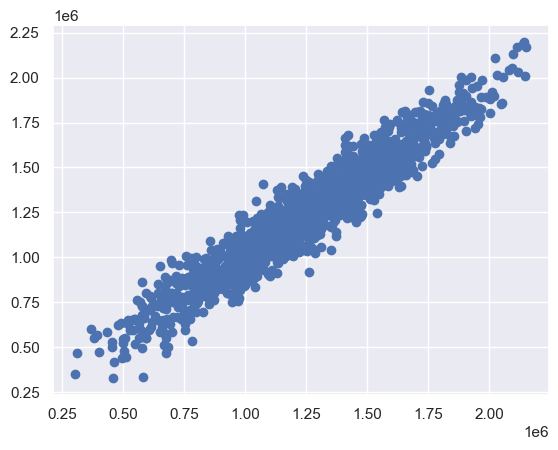

In [54]:
# Check normality
plt.scatter(y_test, y_pred)

<AxesSubplot:xlabel='Price', ylabel='Density'>

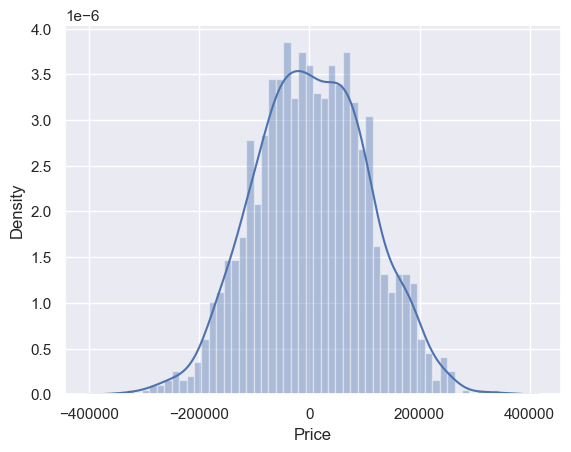

In [55]:
sns.distplot((y_test - y_pred), bins=50)

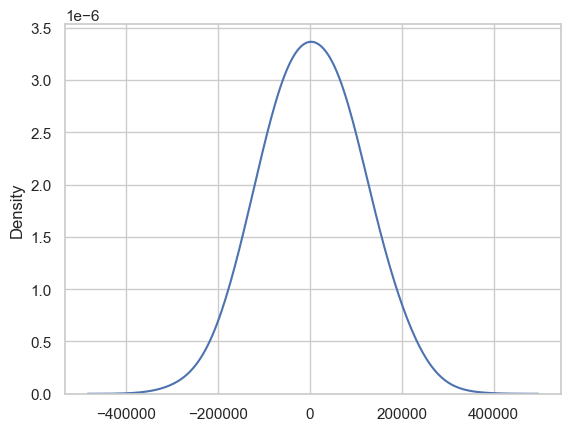

In [56]:
delta = y_test - y_pred # residual 
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

In [57]:
# Adj. R-squared (uncentered):	0.967
# P_value = all are statically significant
# Durbin-Watson:	2.019
# VIF - all are less 5, there is no multicollinearity
# Data is linear and normality
# there is no endogenity problem
# there is no hetroscadiscity


In [58]:
# Regularisation method to handle overfitting problem
# method - Ridge (L2)
# Lasso (L1)
# ElasticNet(Ridge + Lasso)

In [59]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge

In [60]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.9114857713538369

In [61]:
ridge_reg.coef_

array([221785.43872062, 158509.39088402, 115885.21429095,   3856.92639204,
       144207.96049993])

# Lasso

In [62]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.9114867126823606

In [63]:
lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.9114867401263049

# ElasticNet

In [64]:
elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(x_train, y_train)
y_pred_elastic = elastic_reg.predict(x_test)
r2_score(y_test, y_pred_elastic)

0.9076795322026469

# Linear Regression

In [65]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
y_pred_linear = linear_reg.predict(x_test)
r2_score(y_test, y_pred_linear)

0.9114867182323118

In [66]:
y_pred_linear_train = linear_reg.predict(x_train)
y_pred_linear_test = linear_reg.predict(x_test)

print("Train Accuracy",r2_score(y_train, y_pred_linear_train))
print("##############"*5)
print("Test Accuracy",r2_score(y_test, y_pred_linear_test))


Train Accuracy 0.911722467490663
######################################################################
Test Accuracy 0.9114867182323118


In [ ]:
## Adjusted R^2 -
r2_score = 0.9939142145413482   # r2_score(y_test, pred_y)
n = x.shape[0] # total number of observations
p = x.shape[1]  # number of predictors
adj_r2_score = 1 - (1-r2_score)*(n-1)/(n-p-1)
adj_r2_score

In [67]:
# Point to be noted
# Adj. R-squared (uncentered):	0.967
# P_value = all are statically significant
# Durbin-Watson:	2.019
# VIF - all are less 5, there is no multicollinearity
# Data is linear and normality
# there is no endogenity problem
# there is no hetroscadiscity
# all parameter satisfied
# there is no high variance and high bias problem in my model

# That's it for Linear Regression

In [68]:
new_data = pd.read_excel('predict_USA_HOUSING_PRICE.xlsx')
new_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,57528,98590,79379,56032,69292
1,74814,68630,63068,75858,96050
2,57454,68543,69591,67271,74384
3,86189,81973,55410,77688,59947
4,54022,99482,51551,54712,87974
5,51103,59815,64465,73427,77219
6,85388,89157,71711,67805,52924
7,70936,62389,85946,89441,57380
8,91255,77425,95391,91059,90523
9,59225,62028,97009,75518,61824


In [69]:
y_pred_newdata = linear_reg.predict(new_data)

In [70]:
y_pred_newdata 

array([4.77964147e+10, 4.89262057e+10, 4.26604441e+10, 4.74772208e+10,
       4.66243077e+10, 3.97068486e+10, 4.92765531e+10, 4.42038054e+10,
       5.69742730e+10, 4.34184710e+10, 5.03347772e+10, 5.38348488e+10,
       4.93308196e+10, 4.68396785e+10])

In [71]:
new_price_USAHousing = pd.concat([new_data, pd.DataFrame(y_pred_newdata )], axis=1)

In [72]:
new_price_USAHousing.rename(columns = {0:'Price'}, inplace=True)

In [73]:
new_price_USAHousing

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,57528,98590,79379,56032,69292,4.779641e+10
1,74814,68630,63068,75858,96050,4.892621e+10
2,57454,68543,69591,67271,74384,4.266044e+10
3,86189,81973,55410,77688,59947,4.747722e+10
4,54022,99482,51551,54712,87974,4.662431e+10
5,51103,59815,64465,73427,77219,3.970685e+10
6,85388,89157,71711,67805,52924,4.927655e+10
7,70936,62389,85946,89441,57380,4.420381e+10
8,91255,77425,95391,91059,90523,5.697427e+10
9,59225,62028,97009,75518,61824,4.341847e+10


In [74]:
new_price_USAHousing.to_csv("new_price.csv")

In [75]:
# deployment part - flask

In [76]:
# Home Work - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [77]:
# model measurement 
# 1) MSE
# 2) RMSE
# 3) MAE
# 4) MAPE

In [78]:
from sklearn import metrics

In [79]:
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print("##################"*5)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("##################"*5)
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print("##################"*5)
print('MAPE', metrics.mean_absolute_percentage_error(y_test, y_pred))

MSE 10468560930.373041
##########################################################################################
RMSE 102315.98570298309
##########################################################################################
MAE 82947.7966404573
##########################################################################################
MAPE 0.07405829471292616


# Gradient Descent Method

In [80]:
from sklearn.linear_model import SGDRegressor

In [81]:
sgd= SGDRegressor()
sgd.fit(x_train, y_train)

SGDRegressor()

In [82]:
y_pred_sgd = sgd.predict(x_test)
r2_score(y_test, y_pred_sgd)

0.911562355222999

# Decision Tree Regression Model

In [83]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [84]:
y_pred_dt = dtree.predict(x_test)

In [85]:
y_pred_dt

array([1114169.03738301,  894251.06863578, 1547888.6330482 , ...,
       1592210.17592313, 2120888.34520963, 1115466.58507141])

In [86]:
# Evaluate the model
r2_score(y_test, y_pred_dt)

0.7469391641471952

# RandomForest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000)
rforest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [97]:
y_pred_rf = rforest.predict(x_test)

In [98]:
r2_score(y_test, y_pred_rf)

0.8839163811481947

# Polynomial Regression

In [87]:
from sklearn.preprocessing import PolynomialFeatures
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 *X + 2 + np.random.randn(200,1)
# y = 0.8x^2 + 0.9*x + 2

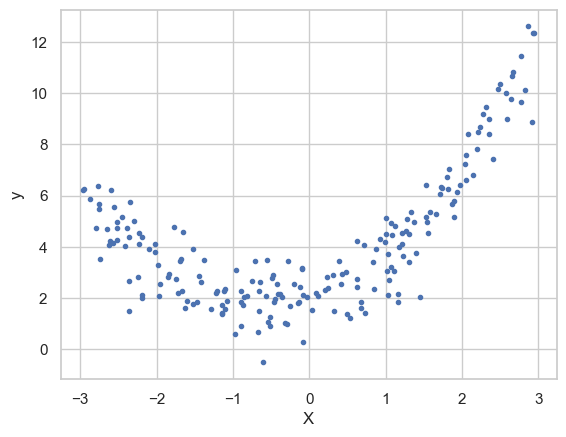

In [88]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [89]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(x_train2, y_train2)
y_pred = lr.predict(x_test2)
r2_score(y_test2, y_pred)

-0.022742458694592127

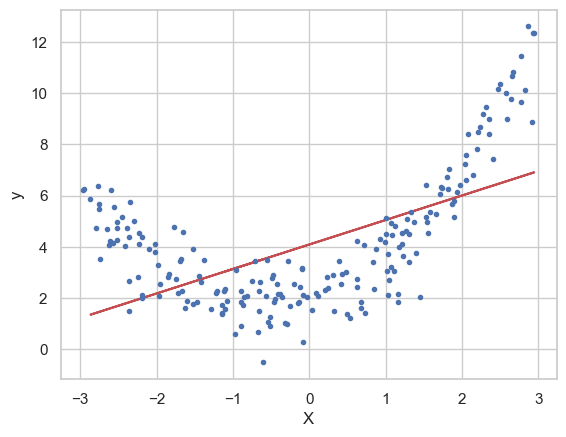

In [90]:
plt.plot(x_train2, lr.predict(x_train2), color='r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# polynomial regression

In [91]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train2)
x_test_trans = poly.fit_transform(x_test2)

In [92]:
linear_poly = LinearRegression()
linear_poly.fit(x_train_trans, y_train2)
y_pred_ply = linear_poly.predict(x_test_trans)
r2_score(y_test2,y_pred_ply)

0.844861907529862

In [93]:
linear_poly.coef_

array([[0.        , 0.93814962, 0.78374561]])

In [94]:
linear_poly.intercept_

array([2.01520069])

In [99]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train2, y_train2)

DecisionTreeRegressor()

In [100]:
y_pred_dt = dtree.predict(x_test2)

In [102]:
r2_score(y_test2, y_pred_dt)

0.7197825160935457

In [103]:
dtree.fit(x_train_trans, y_train2)

DecisionTreeRegressor()

In [104]:
y_pred_dt = dtree.predict(x_test_trans)

In [105]:
r2_score(y_test2, y_pred_dt)

0.7197825160935457

In [ ]:
# random forest with polynomial dataset

In [106]:
rforest = RandomForestRegressor(n_estimators=1000)
rforest.fit(x_train2, y_train2)

RandomForestRegressor(n_estimators=1000)

In [107]:
y_pred_rf = rforest.predict(x_test2)

In [108]:
r2_score(y_test2, y_pred_rf)

0.7846796832638137